In [ ]:
'''
案例二主要是基于“蒙特卡罗思想”，求解排队等待时间问题

场景：厕所排队问题
1、两场电影结束时间相隔较长，互不影响；
2、每场电影结束之后会有20个人想上厕所；
3、这20个人会在0到10分钟之内全部到达厕所）；
4、每个人上厕所时间在1-3分钟之间
首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行。
分析：对于每个人都有如下几个参数：
到达时间 / 等待时间 / 开始上厕所时间 / 结束时间

课程技术点：
随机数 / 循环语句

参考文章：
《我们进行了1亿次婚恋配对实验，然后...》，链接：http://mp.weixin.qq.com/s/Bu3g6sgoKEGq9M24UWDrmg
'''

In [ ]:
'''
Part1  设置随机值
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrivingtime = np.random.uniform(0, 10, size=20)   # 随机数：均匀分布的样本值
arrivingtime.sort()
workingtime = np.random.uniform(1, 3, size=20)

# 开始时间都是0
startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptytime = [0 for i in range(20)]

print('arrivingtime\n', arrivingtime, '\n')
print('workingtime\n', workingtime, '\n')
print('startingtime\n', startingtime, '\n')
print('finishtime\n', finishtime, '\n')
print('waitingtime\n', waitingtime, '\n')
print('emptytime\n', emptytime, '\n')

arrivingtime
 [0.86634328 0.98186658 1.19171615 2.71012849 3.25204853 4.45018197
 4.72906073 4.92133021 5.92318509 6.08301014 6.12439368 7.05961504
 7.14940323 7.90975813 7.97704524 7.9835155  9.04921641 9.05557974
 9.22505371 9.38346885] 

workingtime
 [2.21296718 1.46880771 2.25693449 1.08454285 2.74021112 2.387241
 1.73810033 2.00756862 2.40965686 1.59423013 1.66114884 2.58678944
 1.71714778 1.29014538 1.52191637 2.51164769 2.89627786 1.68150976
 1.01700689 1.58202326] 

startingtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

finishtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

waitingtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

emptytime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 



In [ ]:
'''
Part2  第一人上厕所时间
'''

In [7]:
startingtime[0] = arrivingtime[0]   # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + working[0]   # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0] - arrivingtime[0]   # 第一个人不用等待

In [ ]:
'''
Part3  第二人之后
'''

第1个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.9818665750179933 0.9818665750179933 1.4688077139962203 2.4506742890142137 0.0 

第2个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 1.1917161465849124 2.4506742890142137 2.2569344915209566 4.70760878053517 1.2589581424293013 

第3个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.7101284928921743 4.70760878053517 1.0845428469821197 5.79215162751729 1.997480287642996 

第4个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.252048534261757 5.79215162751729 2.740211117958167 8.532362745475456 2.5401030932555333 

第5个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.450181969559722 8.532362745475456 2.3872409969493997 10.919603742424856 4.0821807759157345 

第6个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.729060733624211 10.919603742424856 1.7381003325918678 12.657704075016724 6.1905430088006455 

第7个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.9213302084751955 12.657704075016724 2.0075686188281123 14.665272693844837 7.736373866541529 

第8个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.9231850858446125 14.665272693844837 2.409656855163907 17.074929549008743 8.74208760800

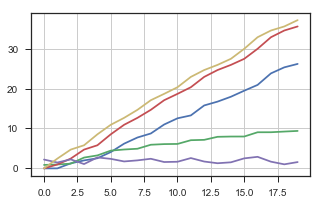

In [19]:
# 判断：如果下一个人在上一个人完成之前到达，则 开始时间 = 上一个人完成时间，
# 否则：开始时间 = 到达时间，且存在空闲时间 = 到达时间 - 上一个人完成时间
for i in range(1, len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]

    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print('第%d个人：到达时间 开始时间 “工作”时间 完成时间 等待时间\n' %i,
          arrivingtime[i],
          startingtime[i],
          workingtime[i],
          finishtime[i],
          waitingtime[i],
         '\n')

print('arerage waiting time is %f' %np.mean(waitingtime))

%matplotlib inline
sns.set(style='ticks')
fig = plt.figure(figsize=(5, 3))
plt.plot(waitingtime)
plt.plot(arrivingtime)
plt.plot(startingtime)
plt.plot(workingtime)
plt.plot(finishtime)
plt.grid(True)
plt.show()